In [8]:
import os
from torch.utils.tensorboard import SummaryWriter
import dataLoader
import models   
import trainer
import trainUtils
import validate
import torch
import matplotlib.pyplot as plt

In [6]:
root = 'Data/'
valSize = 0.3
batchSize = 1
numWorkers = 1
shuffle = True
learningRate = 1e-3
momentum = 0.9
beta = 0.999
milestones = [100, 150, 200] # Epochs at which lr is divided by 2
gamma = 0.5
biasDecay = 0
weightDecay = 4e-4
trainLoader, valLoader = dataLoader.prepareDataLoaders()
networkData = None
epochs = 1
printFreq = 10
model = models.__dict__['baseModel'](networkData)
#device, model, optimizer, scheduler = trainer.prepareTraining(model, biasDecay, weightDecay, learningRate, momentum, beta, milestones, gamma)
savePath = 'Results'

Train data: [['Data/FrontImages/Image542.png', 'Data/LeftImages/Image542.png', 'Data/RightImages/Image542.png'], [array([0.], dtype=float32), array([0.], dtype=float32)]]
Val data: [['Data/FrontImages/Image442.png', 'Data/LeftImages/Image442.png', 'Data/RightImages/Image442.png'], [array([0.], dtype=float32), array([0.], dtype=float32)]]


In [5]:
loss = torch.nn.MSELoss()
for i, (input, target) in enumerate(trainLoader):
    input = torch.cat(input,1).to(device)
    target = torch.cat(target,1).to(device)
    output = model(input)
    print(target.dtype, output.dtype, input.dtype)
    error = loss(output, target)
    print(error, type(error), error.item())
    error.backward()
    break

NameError: name 'device' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


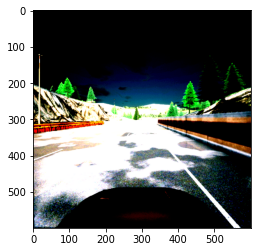

In [10]:
for i, (input, target) in enumerate(trainLoader):
    image = input[0][0]
    plt.imshow(image.permute(1,2,0)) #rgb
    plt.savefig('trainingModel.png')
    plt.show()
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


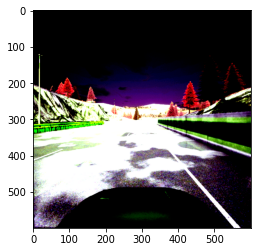

In [31]:
plt.imshow(image[[1,0,2],:,:].permute(1,2,0))

In [ ]:
plt.show()

In [18]:
print(image[[2,0,1],:,:].shape)

torch.Size([3, 600, 600])


In [ ]:
imageD[[],:,:]
print(imageD)

In [26]:
print(image[[2,0,1],:,:])

tensor([[[-0.7179, -0.7179, -0.7179,  ..., -0.6594, -0.7179, -0.7179],
         [-0.7179, -0.6594, -0.7179,  ..., -0.6594, -0.6594, -0.7179],
         [-0.7179, -0.7179, -0.7179,  ..., -0.6594, -0.7179, -0.7179],
         ...,
         [-0.3960, -0.3667, -0.0740,  ..., -0.3960, -0.6008, -0.3667],
         [-0.6008, -0.6008,  0.0430,  ..., -0.5130, -0.6594, -0.4545],
         [-0.7764, -0.5423, -0.0740,  ..., -0.6594, -0.6594, -0.5130]],

        [[-1.3709, -1.3709, -1.3709,  ..., -1.3032, -1.3709, -1.3709],
         [-1.3709, -1.3032, -1.3709,  ..., -1.3032, -1.3032, -1.3709],
         [-1.3709, -1.3709, -1.3709,  ..., -1.3032, -1.3709, -1.3709],
         ...,
         [-0.9314, -0.7285, -0.6271,  ..., -0.9314, -0.9314, -0.7285],
         [-1.0666, -0.7961, -0.3905,  ..., -0.9990, -0.9314, -0.7961],
         [-1.3032, -0.9314, -0.6271,  ..., -0.9990, -0.9314, -0.9314]],

        [[-0.8256, -0.8256, -0.8256,  ..., -0.7700, -0.8256, -0.8256],
         [-0.8256, -0.8256, -0.8256,  ..., -0

In [27]:
print(image)

tensor([[[-1.3709, -1.3709, -1.3709,  ..., -1.3032, -1.3709, -1.3709],
         [-1.3709, -1.3032, -1.3709,  ..., -1.3032, -1.3032, -1.3709],
         [-1.3709, -1.3709, -1.3709,  ..., -1.3032, -1.3709, -1.3709],
         ...,
         [-0.9314, -0.7285, -0.6271,  ..., -0.9314, -0.9314, -0.7285],
         [-1.0666, -0.7961, -0.3905,  ..., -0.9990, -0.9314, -0.7961],
         [-1.3032, -0.9314, -0.6271,  ..., -0.9990, -0.9314, -0.9314]],

        [[-0.8256, -0.8256, -0.8256,  ..., -0.7700, -0.8256, -0.8256],
         [-0.8256, -0.8256, -0.8256,  ..., -0.7700, -0.7700, -0.8256],
         [-0.9091, -0.8256, -0.8256,  ..., -0.7700, -0.8256, -0.8256],
         ...,
         [-0.4919, -0.2972, -0.1025,  ..., -0.6031, -0.8256, -0.6031],
         [-0.4919, -0.4362, -0.1581,  ..., -0.7144, -0.9647, -0.7700],
         [-0.6587, -0.5475, -0.3806,  ..., -0.6587, -0.7700, -0.8256]],

        [[-0.7179, -0.7179, -0.7179,  ..., -0.6594, -0.7179, -0.7179],
         [-0.7179, -0.6594, -0.7179,  ..., -0

In [9]:
trainWriter = SummaryWriter(os.path.join(savePath, 'train'))
valWriter = SummaryWriter(os.path.join(savePath, 'val'))
bestError = -1
iteration = 0
loss = torch.nn.MSELoss()
print('Current average value and timings for single batch will be printed')
for epoch in range(epochs):lss
    trainError, iteration = trainer.training(trainLoader, trainWriter, model, optimizer, device, loss, epoch, iteration, printFreq)
    trainWriter.add_scalar('mean error', trainError, epoch)
    with torch.no_grad():
        currentError = validate.validate(valLoader, model, device, loss, epoch, printFreq)
    valWriter.add_scalar('mean error', currentError, epoch)

    scheduler.step
    if bestError < 0:
        bestError = currentError
    isBest = currentError < bestError
    bestError = min(currentError, bestError)
    trainUtils.saveCheckpoint({ 
        'epoch': epoch + 1,
        'state_dict': model.state_dict(),
        'bestError': bestError,
        }, isBest, savePath)


Current average value and timings for single batch will be printed
Epoch: [0][0/70]	 SingleBatchTime 0.115 (0.115)	 DataLoadTime 0.102 (0.102)	 MSE 0.000 (0.000)
Epoch: [0][10/70]	 SingleBatchTime 0.042 (0.049)	 DataLoadTime 0.037 (0.043)	 MSE 0.000 (0.000)
Epoch: [0][20/70]	 SingleBatchTime 0.043 (0.046)	 DataLoadTime 0.037 (0.041)	 MSE 0.000 (0.001)
Epoch: [0][30/70]	 SingleBatchTime 0.044 (0.045)	 DataLoadTime 0.039 (0.040)	 MSE 0.000 (0.001)
Epoch: [0][40/70]	 SingleBatchTime 0.043 (0.045)	 DataLoadTime 0.038 (0.040)	 MSE 0.001 (0.001)
Epoch: [0][50/70]	 SingleBatchTime 0.034 (0.045)	 DataLoadTime 0.029 (0.039)	 MSE 0.000 (0.001)
Epoch: [0][60/70]	 SingleBatchTime 0.043 (0.044)	 DataLoadTime 0.038 (0.039)	 MSE 0.000 (0.001)
Test: [0/30]	 Time 0.099 (0.099)	 MSE 0.000 (0.000)
Test: [10/30]	 Time 0.042 (0.048)	 MSE 0.000 (0.000)
Test: [20/30]	 Time 0.042 (0.046)	 MSE 0.001 (0.000)
 * EPE 0.00027095555215055355
